# Run py12box model
Run the AGAGE 12-box model

In [279]:
import os
import matplotlib.pyplot as plt
import setup
import core
import numpy as np
from pathlib import Path
from pyprojroot import here
from pandas import read_csv

In [283]:
input_dir = here() / "inputs"
project_dir = here() / "example"

case = "CFC-11_example"
species = "CFC-11"

mol_mass, OH_A, OH_ER = setup.get_species_parameters(species)
time, emissions, ic, lifetime = setup.get_case_parameters(project_dir, case, species)

In [284]:
i_t, i_v1, t, v1, OH, Cl, temperature = setup.get_model_parameters(int(len(time) / 12))
F = setup.transport_matrix(i_t, i_v1, t, v1)

c_month, burden, emissions_out, losses, lifetimes = \
    core.model(ic=ic, q=emissions,
               mol_mass=mol_mass,
               lifetime=lifetime,
               F=F,
               temp=temperature,
               cl=Cl, oh=OH,
               arr_oh = np.array([OH_A, OH_ER]))

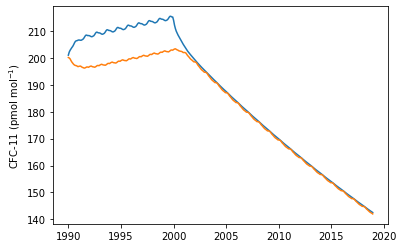

In [285]:
plt.plot(time, c_month[:, 0])
plt.plot(time, c_month[:, 3])
plt.ylabel("%s (pmol mol$^{-1}$)" % species)
plt.show()

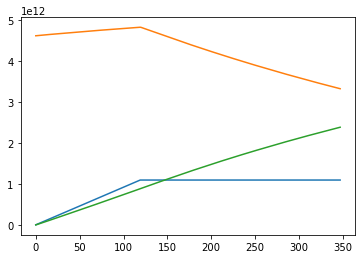

In [286]:
plt.plot(emissions_out.sum(axis = 1).cumsum())
plt.plot(burden.sum(axis = 1))
plt.plot(losses["other"].sum(axis = 1).cumsum())

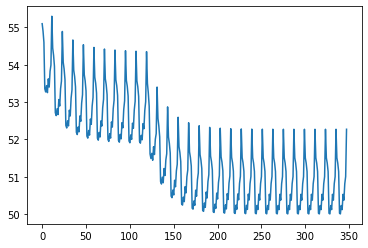

In [287]:
plt.plot(lifetimes["global_total"])